# Echo State Stochastic Volatility Heston Dynamical Model



In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from numba import jit
import os
import scipy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.layers import Dense
import keras


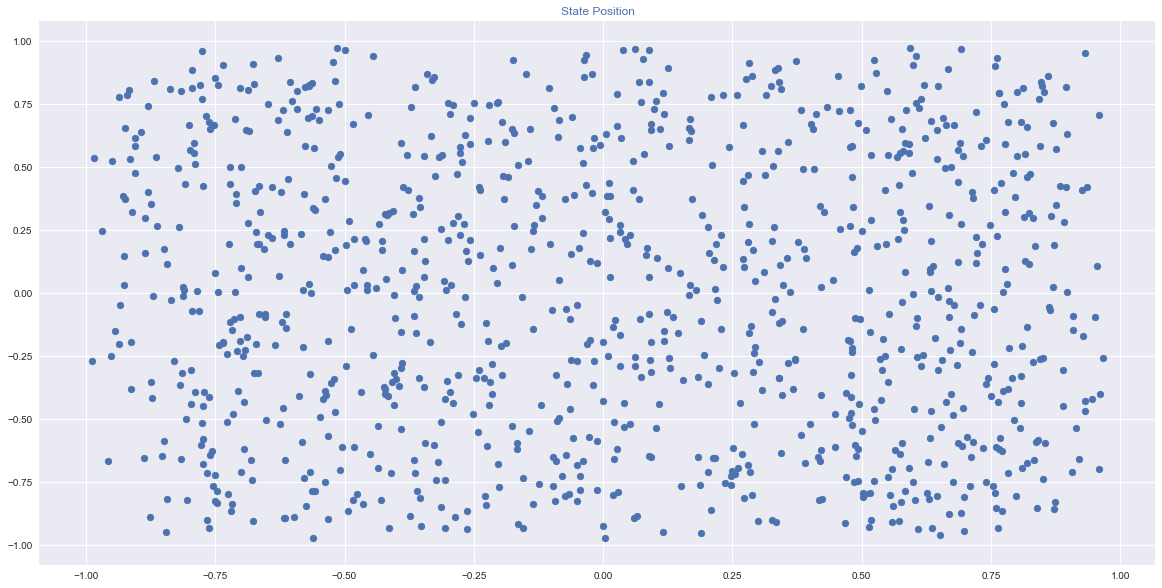

'\nstates = np.array(x_list).reshape(x_dim, u_num+1)\n\n\nmpl.style.use("seaborn")\nfig, ax = plt.subplots(figsize=(20, 10))\nax.set_title(\'State Transition\'.format("seaborn"), color=\'C0\')   \n   \nfor i in range(x_dim):\n    ax.plot([j for j in range(u_num+1)], [states[i][j] for j in range(u_num+1)])\n        \nplt.show() \n'

In [173]:
x_dim = 2
u_num = 1000
u_dim = 5
u_mag = 2

nans = np.random.randint(0,2, size=(x_dim, x_dim))
W = np.random.uniform(-100, 100, x_dim*x_dim).reshape([x_dim, x_dim])
W = np.where(nans, np.nan, W)
W = np.nan_to_num(W)
W = W / (np.linalg.svd(W)[1].tolist()[0]*1.2)




u = np.random.uniform(-u_mag, u_mag, u_num*u_dim).reshape([u_num, u_dim])

W_in = np.random.uniform(-5, 5, x_dim*u_dim).reshape([x_dim, u_dim])

W_in = W_in / (np.linalg.svd(W_in)[1].tolist()[0]*1.2)

x_list = [np.zeros([x_dim])]


for i in range(u_num):
    x_next = np.tanh( np.matmul(W_in, u[i]) + np.matmul(W, x_list[-1]))
    x_list.append(x_next)


mpl.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('State Position'.format("seaborn"), color='C0')   
   
states = np.array(x_list).reshape(x_dim, u_num+1)
ax.scatter(states[0], states[1])
        
plt.show()


"""
states = np.array(x_list).reshape(x_dim, u_num+1)


mpl.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('State Transition'.format("seaborn"), color='C0')   
   
for i in range(x_dim):
    ax.plot([j for j in range(u_num+1)], [states[i][j] for j in range(u_num+1)])
        
plt.show() 
"""

